# Iris Classification

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv('Iris.csv') #Data Frame

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [12]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.Species = df.Species.astype('category').cat.codes

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [16]:
print('x_shape:',x.shape)
print('y_shape:',y.shape)

x_shape: (150, 4)
y_shape: (150,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

print("x train shape:",x_train.shape,"\ny train shape:",y_train.shape,
      "\nx test shape:",x_test.shape,"\ny test shape:",y_test.shape)

x train shape: (120, 4) 
y train shape: (120,) 
x test shape: (30, 4) 
y test shape: (30,)


In [18]:
x_train[0]

array([6.1, 3. , 4.6, 1.4])

In [19]:
y_train[0]

1

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
yp = model.predict(x_test)

In [22]:
acc = accuracy_score(yp, y_test)
print("Testing Accuracy:", round(acc*100,2), '%')

Testing Accuracy: 96.67 %


<Axes: title={'center': 'Logistic Regression Heatmap'}, xlabel='Predicted', ylabel='Actual'>

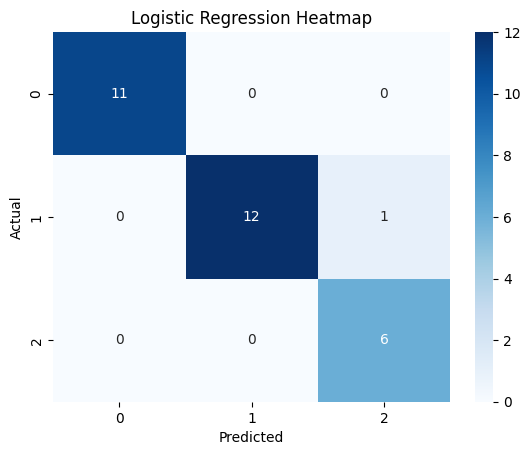

In [23]:
fig = plt.figure()
plt.title("Logistic Regression Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

In [24]:
cr = classification_report(yp, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



---